# MIT 

In [1]:
import albumentations as A        # For data augmentation
import cv2                        # For loading images
import matplotlib.pyplot as plt   # For plotting images
import numpy as np
import random

## Read Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [7]:
image = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Computer Vision/Augmentation/input/car.png')  # BGR


In [8]:
print(image.shape)

(656, 964, 3)


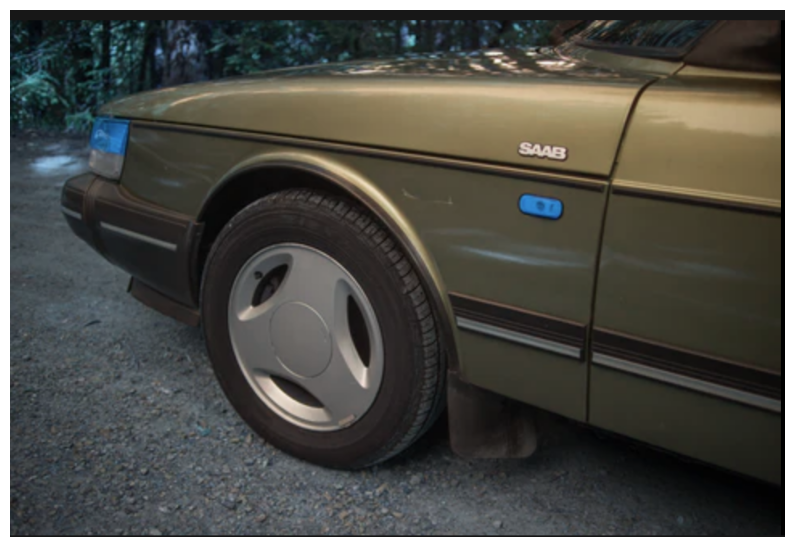

In [9]:
# cv2_imshow(image)
visualize(image)

In [10]:
# converting BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

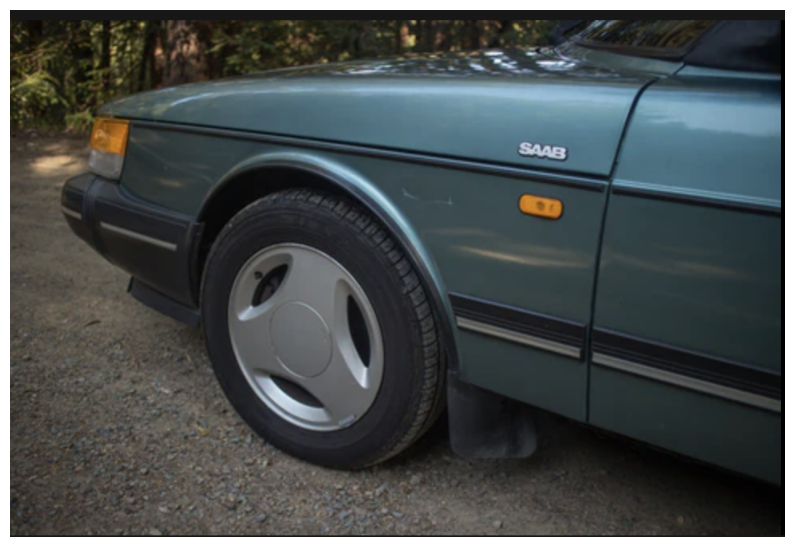

In [11]:
visualize(image)

OpenCV provides us several interpolation methods for resizing an image.


Choice of Interpolation Method for Resizing:

1. cv2.INTER_AREA: This is used when we need to shrink an image.

2. cv2.INTER_CUBIC: This is slow but more efficient.

3. cv2.INTER_LINEAR: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.

In [12]:
width = 1280
height = 1280
dim = (width, height)
  
# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)

Resized Dimensions :  (1280, 1280, 3)


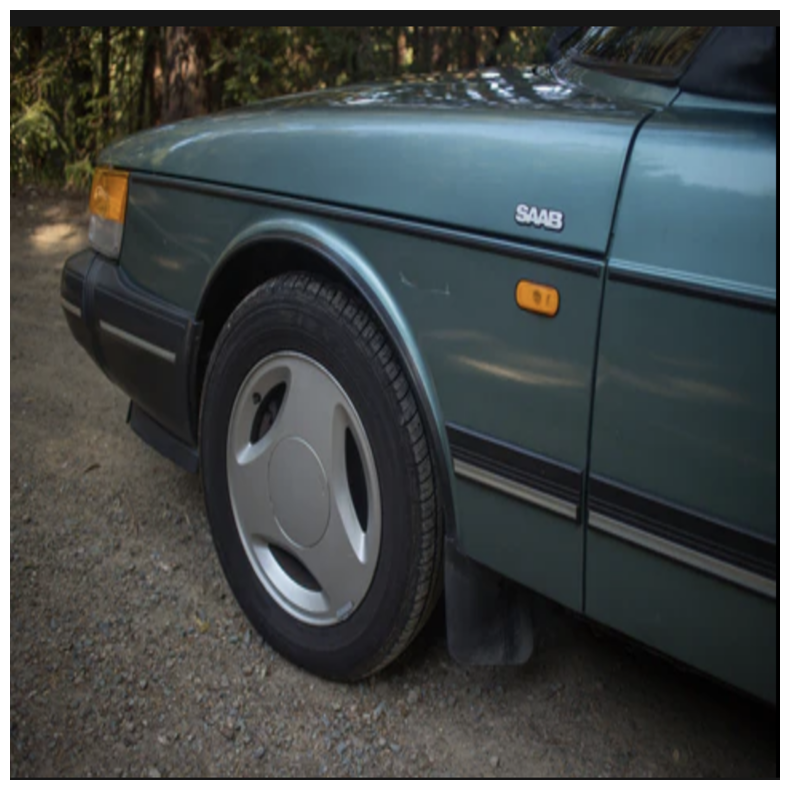

In [13]:
print('Resized Dimensions : ',resized.shape)
 
visualize(resized)

In [14]:
print(A.__version__)

1.2.1


# Transforms 

1.   [CROP](https://albumentations.ai/docs/api_reference/augmentations/crops/transforms/#albumentations.augmentations.crops.transforms.Crop)
2.   [Resize](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.geometric.resize.Resize)
3.  [Flip](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.geometric.transforms.Flip)
4.  [VerticalFlip](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.geometric.transforms.VerticalFlip)
5.  [HorizontalFlip](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.geometric.transforms.HorizontalFlip)
6.  [Transpose](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.geometric.transforms.Transpose)
7.  [Rotate](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.geometric.rotate.Rotate)
8.  [Scale](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.geometric.resize.RandomScale)
9.  [RGB_SHIFT](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.transforms.RGBShift)
10. [BLUR](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.blur.transforms.Blur)
11. [CLAHE](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.transforms.CLAHE)
12. [ColorJitter](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.transforms.ColorJitter)
13. [Downscale](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.transforms.Downscale)
14. [ShiftScaleRotate](https://albumentations.ai/docs/api_reference/full_reference/#albumentations.augmentations.geometric.transforms.ShiftScaleRotate)
15. [GaussNoise](https://albumentations.ai/docs/api_reference/augmentations/transforms/)



In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

## All in One

In [72]:
# Resize
resize = A.Resize(height = 1080, width = 1080, interpolation = 3)
augmentation_resize = resize(image = image)
augmented_resize_img = augmentation_resize["image"]

# Crop
randomCrop = A.RandomCrop (height = 256, width = 256, always_apply=False, p=1.0)
augmentation_randomCrop = randomCrop(image = image)
augmented_randomCrop_img = augmentation_randomCrop["image"]

# rotate
rotate = A.Rotate (limit= -90, interpolation=1, border_mode=1, value=None, mask_value=None, crop_border=False, always_apply=False, p=1.0)
augmentation_rotate = rotate(image = image)
augmented_rotate_img = augmentation_rotate["image"]

# Flip
flip = A.Flip(p = 1.0)
augmentation_flip = flip(image = image)
augmented_flip_img = augmentation_flip["image"]

# Vertical Flip
V_flip = A.VerticalFlip(p = 1.0)
augmentation_V = V_flip(image = image)
augmented_V_img = augmentation_V["image"]

# Horizontal Flip
H_flip = A.HorizontalFlip(p = 1.0)
augmentation_H = H_flip(image = image)
augmented_H_img = augmentation_H["image"]

# RGB Shift
rgbShift = A.RGBShift (r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, always_apply=False, p=1.0)
augmentation_rgbShift = rgbShift(image = image)
augmented_rgbShift_img = augmentation_rgbShift["image"]

# Blue
blur = A.Blur (blur_limit=70, always_apply=False, p=1.0)
augmentation_blur = blur(image = image)
augmented_blur_img = augmentation_blur["image"]

# Contrast Limited Adaptive Histogram Equalization
clahe = A.CLAHE (clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0)
augmentation_clahe = clahe(image = image)
augmented_clahe_img = augmentation_clahe["image"]

# Scale
randomscale = A.RandomScale (scale_limit=0.1, interpolation=1, always_apply=False, p=1.0)
augmentation_randomscale = randomscale(image = image)
augmented_randomscale_img = augmentation_randomscale["image"]

# Shift Scale Rotate
Shift_Scale_Rotate = A.ShiftScaleRotate (shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, interpolation=1, border_mode=4, value=None, mask_value=None, shift_limit_x=None, shift_limit_y=None, rotate_method='largest_box', always_apply=False, p=1.0)
augmentation_SSR = Shift_Scale_Rotate(image = image)
augmented_SSR_img = augmentation_SSR["image"]

# Noise
g_noise = A.GaussNoise (var_limit=(10.0, 100.0), mean=0, per_channel=True, always_apply=False, p=1.0)
augmentation_g_noise = g_noise(image = image)
augmented_g_img = augmentation_g_noise["image"]

(-0.5, 963.5, 655.5, -0.5)

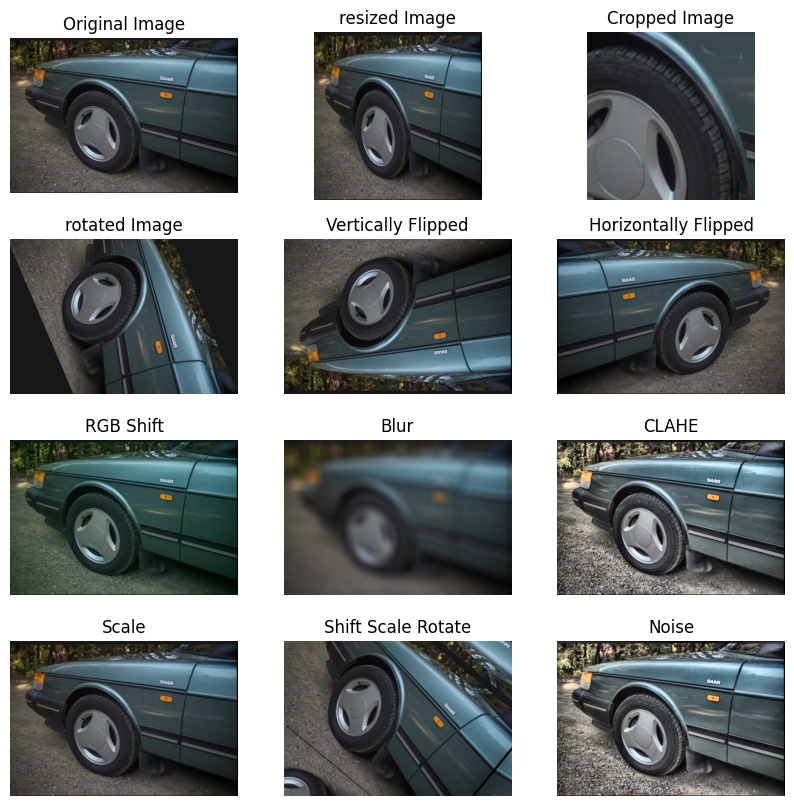

In [73]:
_, axarr = plt.subplots(4,3, figsize=(10,10))

# Original Image
axarr[0, 0].set_title('Original Image')
axarr[0,0].imshow(image)
axarr[0,0].axis('off')

# Resized Image
axarr[0, 1].set_title('resized Image')
axarr[0,1].imshow(augmented_resize_img)
axarr[0,1].axis('off')

# Cropped Image
axarr[0, 2].set_title('Cropped Image')
axarr[0, 2].imshow(augmented_randomCrop_img)
axarr[0, 2].axis('off')

# Rotated Image
axarr[1, 0].set_title('rotated Image')
axarr[1, 0].imshow(augmented_rotate_img)
axarr[1, 0].axis('off')

# Flipped Image

# axarr[1, 1].set_title('Flipped Image')
# axarr[1, 1].imshow(augmented_flip_img)
# axarr[1, 1].axis('off')

axarr[1, 1].set_title('Vertically Flipped')
axarr[1, 1].imshow(augmented_V_img)
axarr[1, 1].axis('off')

axarr[1, 2].set_title('Horizontally Flipped')
axarr[1, 2].imshow(augmented_H_img)
axarr[1, 2].axis('off')

# RGB shift
axarr[2,0].set_title('RGB Shift')
axarr[2,0].imshow(augmented_rgbShift_img)
axarr[2,0].axis('off')

# Blur
axarr[2, 1].set_title('Blur')
axarr[2, 1].imshow(augmented_blur_img)
axarr[2, 1].axis('off')

# Contrast Limited Adaptive Histogram Equalization
axarr[2,2].set_title('CLAHE')
axarr[2,2].imshow(augmented_clahe_img)
axarr[2,2].axis('off')

# Scale
axarr[3,0].set_title('Scale')
axarr[3,0].imshow(augmented_randomscale_img)
axarr[3,0].axis('off')

# Shift Scale Rotate
axarr[3,1].set_title('Shift Scale Rotate')
axarr[3,1].imshow(augmented_SSR_img)
axarr[3,1].axis('off')

# Noise
axarr[3,2].set_title('Noise')
axarr[3,2].imshow(augmented_clahe_img)
axarr[3,2].axis('off')